In [54]:
"""
Criando um modelo de classificador SVM (linear) com
base no conjunto de dados 'Iris'
Fonte: https://www.analyticsvidhya.com/blog/2015/10/understaing-support-vector-machine-example-code/
"""

# Bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [50]:
# Importando dados do conjunto Iris
iris = datasets.load_iris()
# Extraindo apenas as duas primeiras colunas do dataset (avoid this ugly slicing by using a two-dim dataset)
X = iris.data[:, :2] 
# Rótulo das amostras
y = iris.target

In [51]:
# Classificador SVM com kernel Linear
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X, y)

"""
Observações: 
1. Vale testar outras combinações de parâmetros C e gamma, os quais flexibilizam
as fronteiras de decisão do modelo, permitindo maior flexibilidade na classificação;

2. Também pode ser interessante analisar também outros kernels (RBF, Poly e Sigmoid) 
diante das características de dataset's mais complexos.
"""

In [52]:
# Preparando os dados para plotar
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

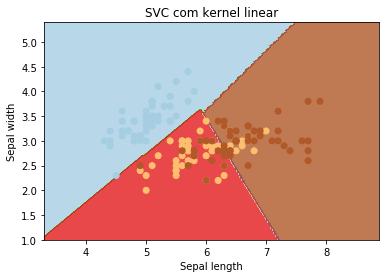

In [53]:
# Gráfico contendo os dados, fronteira de decisão (áreas Wi)
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC com kernel linear')
plt.show()